In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# Load dataset 

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

# Visualizations

## Univariate Analysis

In [6]:
# Taking first 1000 data
test1 = df[:1000]

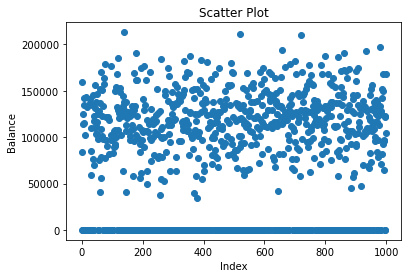

In [7]:
plt.title('Scatter Plot')

plt.xlabel('Index')
plt.ylabel('Balance')

plt.scatter(test1.index, test1.Balance)

(array([351.,   6.,  23.,  61., 115., 181., 151.,  76.,  30.,   6.]),
 array([     0.  ,  21314.62,  42629.24,  63943.86,  85258.48, 106573.1 ,
        127887.72, 149202.34, 170516.96, 191831.58, 213146.2 ]),
 <BarContainer object of 10 artists>)

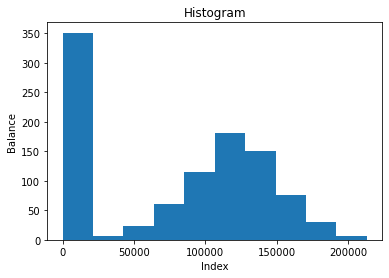

In [8]:
plt.title('Histogram')

plt.xlabel('Index')
plt.ylabel('Balance')
plt.hist(test1.Balance)

## Bi - Variate Analysis

In [9]:
# Taking second 1000 data
test2 = df[1000:2000]

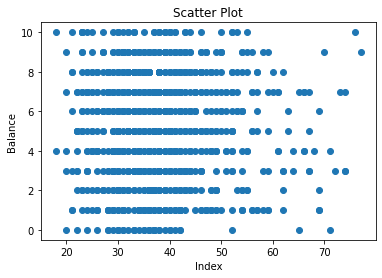

In [10]:
plt.title('Scatter Plot')

plt.xlabel('Index')
plt.ylabel('Balance')
plt.scatter(test2.Age, test2.Tenure)

In [11]:
#Correlation Coefficients
test2.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.040204,-0.002832,-0.008496,0.050148,0.020893,0.015307,-0.055653,0.037777,0.037951,-0.030935
CustomerId,0.040204,1.000000,0.023422,0.002834,-0.025388,0.001293,-0.011828,-0.081305,0.007104,0.013076,-0.052450
CreditScore,-0.002832,0.023422,1.000000,0.014366,-0.030827,-0.027544,0.006870,-0.064839,0.065525,0.017151,-0.038309
Age,-0.008496,0.002834,0.014366,1.000000,-0.014779,0.006054,-0.071598,-0.017030,0.102102,0.023506,0.275024
Tenure,0.050148,-0.025388,-0.030827,-0.014779,1.000000,-0.039529,-0.023393,0.059384,-0.099906,-0.001770,0.015678
Balance,0.020893,0.001293,-0.027544,0.006054,-0.039529,1.000000,-0.265062,-0.038111,0.005300,-0.007437,0.121438
NumOfProducts,0.015307,-0.011828,0.006870,-0.071598,-0.023393,-0.265062,1.000000,-0.033806,-0.019032,-0.014070,-0.099938
HasCrCard,-0.055653,-0.081305,-0.064839,-0.017030,0.059384,-0.038111,-0.033806,1.000000,-0.026770,-0.036648,-0.029763
IsActiveMember,0.037777,0.007104,0.065525,0.102102,-0.099906,0.005300,-0.019032,-0.026770,1.000000,-0.012352,-0.223282
EstimatedSalary,0.037951,0.013076,0.017151,0.023506,-0.001770,-0.007437,-0.014070,-0.036648,-0.012352,1.000000,0.042299


## Multi - Variate Analysis

In [12]:
# Taking third 1000 data
test3 = df[2000:3000]

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

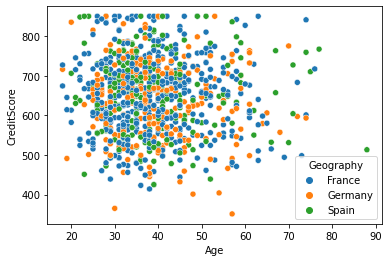

In [13]:
sns.scatterplot(data = test3, x = 'Age', y = 'CreditScore', hue = 'Geography')

# Descriptive Statistics 

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Handle Missing Values

In [15]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [16]:
# There are no null values
# In case any null values,
# df[<column_name>] = df[<column_name>].fillna(df[<column_name>].mean())

# Outliers

<AxesSubplot:xlabel='Age'>

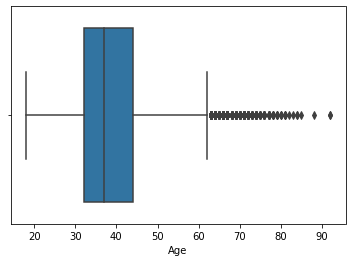

In [17]:
# Identify the outliers
sns.boxplot(df['Age'],data=df)

<AxesSubplot:xlabel='Age'>

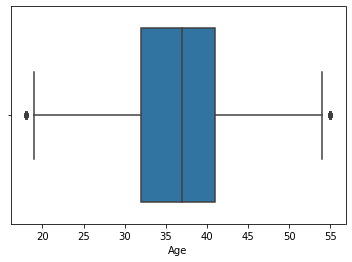

In [18]:
# Outliers is identified as values greater than 60
# Replacing them with Mean

df['Age'] = np.where(df['Age']>55, df['Age'].mean(), df['Age'])
sns.boxplot(df['Age'],data=df)

<AxesSubplot:xlabel='Age'>

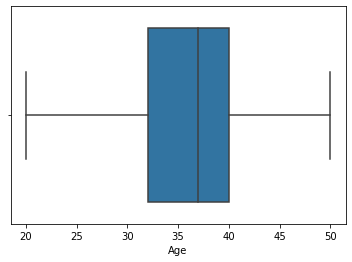

In [19]:
# Again the outliers is identified as values greater than 50 and less than 20
# Replacing them with Mean

df['Age'] = np.where(df['Age']>50, df['Age'].mean(), df['Age'])
df['Age'] = np.where(df['Age']<20, df['Age'].mean(), df['Age'])
sns.boxplot(df.Age)

# Categorical Columns and Encoding

In [20]:
cl = df.select_dtypes(include=['object']).columns.tolist()
print(cl)

['Surname', 'Geography', 'Gender']


In [21]:
df_en = pd.get_dummies(df, columns = cl)
df_en.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42.0,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41.0,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42.0,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39.0,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43.0,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


# Dependent and Independent variables.

In [22]:
# CreditScore is a dependent variable 
dep_var = df_en['CreditScore']
dep_var

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [23]:
# Others are independent variable
indep_var=df_en.drop(columns = ['CreditScore'], axis=1)
indep_var.head()

,RowNumber,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,42.0,2,0.00,1,1,1,101348.88,1,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,41.0,1,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,42.0,8,159660.80,3,1,0,113931.57,1,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,39.0,1,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,43.0,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,0,0,0,1,1,0


# Scaling

In [24]:
indep_var_scaled=pd.DataFrame(scale(indep_var),columns=indep_var.columns)
indep_var_scaled.head()

,RowNumber,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.731878,-0.783213,0.890316,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165,...,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-1.731531,-0.606534,0.733753,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775,...,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.731185,-0.995885,0.890316,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165,...,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,-1.730838,0.144767,0.420626,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775,...,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,-1.730492,0.652659,1.046879,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775,...,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-1.002804,-0.578736,1.742740,1.095988,-1.095988


# Train, Test Data Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(indep_var_scaled, dep_var, train_size = 0.8 )

In [26]:
X_train.shape

(8000, 2947)

In [27]:
y_train.shape

(8000,)

In [28]:
X_test.shape

(2000, 2947)

In [29]:
y_test.shape

(2000,)